<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/DTs/Exercise_1_dt_2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - DT for classification of 2 classes

1. Use the $\texttt{load_breast_cancer}$ data (remember to split your data into a train and a test set). Try to implement a decision tree classifer (with default settings). How well does it perform (i.e. what is its accuracy in diagnosing whether patients have cancer)? 
1. Try different values for **max_depth** (must be integers), **min_samples_split** (must be integers OR a fraction), **min_samples_leaf** (must be integers OR a fraction), and **max_features** (can be an integer, a fraction, or one of "auto", "log2").

**See slides for more details!**

# Exercise 1

Use the $\texttt{load_breast_cancer}$ data (remember to split your data into a train and a test set). Try to implement a decision tree classifer (with default settings). How well does it perform (i.e. what is its accuracy in diagnosing whether patients have cancer)? 

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np

# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y = True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [2]:
# Initialize a DT
dt_default = tree.DecisionTreeClassifier()

# Fit your DT
dt_default.fit(X_train, y_train)

# Predict on your test data with your DT
y_test_hat_default = dt_default.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy_default = accuracy_score(y_test_hat_default, y_test)

# Print results
print(f'DT with default settings achieved {round(accuracy_default * 100, 1)}% accuracy.')

DT with default settings achieved 94.7% accuracy.


In [3]:
# Try also to print the depth of the tree (see slides for example code).
print(f'The depth of the decision tree is {dt_default.get_depth()}.')

The depth of the decision tree is 7.


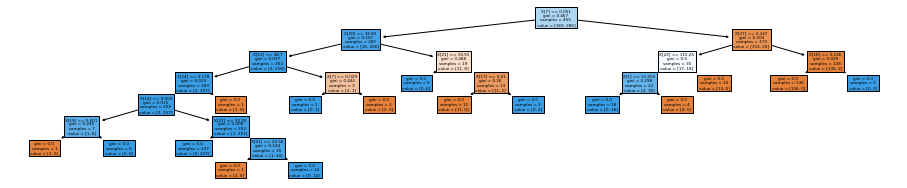

In [4]:
# Plot the tree - you do not have to chance any code here. It will be a bit small.
fig = plt.figure(figsize = plt.figaspect(0.2))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt_default, filled = True)
plt.show()

# Exercise 2

Try different values for **max_depth** (must be integers), **min_samples_split** (must be integers OR a fraction), **min_samples_leaf** (must be integers OR a fraction), and **max_features** (can be an integer, a fraction, or one of "auto", "log2").

I suggest going through each setting one at a time, just playing around with a more restricted (specifically smaller) setting than the default value. The reason is that the default value of each is the unrestricted version.

This means that you should try low values for **max_depth**, **min_samples_split**, **min_samples_leaf**, and **max_features**.

In [5]:
# Try low values for max_depth.

max_depth = 4 # try more values than just 5 here! Also try fractions!

# Initialize DT
dt_low_max_depth = tree.DecisionTreeClassifier(max_depth = max_depth)

# Fit your DT
dt_low_max_depth.fit(X_train, y_train)

# Predict on your test data
y_test_hat_dt_low_max_depth = dt_low_max_depth.predict(X_test)

# Obtain accuracy
accuracy_low_max_depth = accuracy_score(y_test_hat_dt_low_max_depth, y_test)

# Print results
print(f'DT with restricted max_depth achieved {round(accuracy_low_max_depth * 100, 1)}% accuracy.')

# Try also to print the depth of the tree (see slides for example code). This should be what you set it to!
print(f'Depth with restricted max_depth: {dt_low_max_depth.get_depth()}')

DT with restricted max_depth achieved 94.7% accuracy.
Depth with restricted max_depth: 4


In [6]:
maximum_depth = [depth for depth in np.arange(0.5, 12, 0.5)]

for max_depth in maximum_depth:
  dt_low_max_depth = tree.DecisionTreeClassifier(max_depth = max_depth)
  dt_low_max_depth.fit(X_train, y_train)
  y_test_hat_dt_low_max_depth = dt_low_max_depth.predict(X_test)
  accuracy_low_max_depth = accuracy_score(y_test_hat_dt_low_max_depth, y_test)
  print(f'DT with max_depth = {max_depth} achieved {round(accuracy_low_max_depth * 100, 1)}% accuracy.')
  print(f'Depth with max_depth = {max_depth} is {dt_low_max_depth.get_depth()}')
  print(60 * '=')

DT with max_depth = 0.5 achieved 62.3% accuracy.
Depth with max_depth = 0.5 is 0
DT with max_depth = 1.0 achieved 89.5% accuracy.
Depth with max_depth = 1.0 is 1
DT with max_depth = 1.5 achieved 89.5% accuracy.
Depth with max_depth = 1.5 is 1
DT with max_depth = 2.0 achieved 93.0% accuracy.
Depth with max_depth = 2.0 is 2
DT with max_depth = 2.5 achieved 93.0% accuracy.
Depth with max_depth = 2.5 is 2
DT with max_depth = 3.0 achieved 94.7% accuracy.
Depth with max_depth = 3.0 is 3
DT with max_depth = 3.5 achieved 94.7% accuracy.
Depth with max_depth = 3.5 is 3
DT with max_depth = 4.0 achieved 93.9% accuracy.
Depth with max_depth = 4.0 is 4
DT with max_depth = 4.5 achieved 94.7% accuracy.
Depth with max_depth = 4.5 is 4
DT with max_depth = 5.0 achieved 94.7% accuracy.
Depth with max_depth = 5.0 is 5
DT with max_depth = 5.5 achieved 94.7% accuracy.
Depth with max_depth = 5.5 is 5
DT with max_depth = 6.0 achieved 93.9% accuracy.
Depth with max_depth = 6.0 is 6
DT with max_depth = 6.5 achi

In [7]:
# Try low values for min_samples_split.

min_samples_split = 10 # try more values than just 10 here! Also try fractions!

# Initialize DT
dt_low_min_samples_split = tree.DecisionTreeClassifier(min_samples_split = min_samples_split)

# Fit your DT
dt_low_min_samples_split.fit(X_train, y_train)

# Predict on your test data
y_test_hat_dt_low_min_samples_split = dt_low_min_samples_split.predict(X_test)

# Obtain accuraciy
accuracy_low_min_samples_split = accuracy_score(y_test_hat_dt_low_min_samples_split, y_test)

# Print results
print(f'DT with restricted min_samples_split achieved {round(accuracy_low_min_samples_split * 100, 1)}% accuracy.')

# Try also to print the depth of the tree (see slides for example code).
print(f'Depth with restricted min_samples_split: {dt_low_min_samples_split.get_depth()}')

DT with restricted min_samples_split achieved 93.9% accuracy.
Depth with restricted min_samples_split: 7


In [8]:
minimum_samples_split = [min_split for min_split in np.arange(2, 22, 1)]

for min_samples_split in minimum_samples_split:
  dt_low_min_samples_split = tree.DecisionTreeClassifier(min_samples_split = min_samples_split)
  dt_low_min_samples_split.fit(X_train, y_train)
  y_test_hat_dt_low_min_samples_split = dt_low_min_samples_split.predict(X_test)
  accuracy_low_min_samples_split = accuracy_score(y_test_hat_dt_low_min_samples_split, y_test)
  print(f'DT with min_samples_split = {min_samples_split} achieved {round(accuracy_low_min_samples_split * 100, 1)}% accuracy.')
  print(f'Depth with min_samples_split = {min_samples_split} is {dt_low_min_samples_split.get_depth()}')
  print(60 * '=')

DT with min_samples_split = 2 achieved 93.0% accuracy.
Depth with min_samples_split = 2 is 7
DT with min_samples_split = 3 achieved 94.7% accuracy.
Depth with min_samples_split = 3 is 7
DT with min_samples_split = 4 achieved 93.0% accuracy.
Depth with min_samples_split = 4 is 7
DT with min_samples_split = 5 achieved 93.0% accuracy.
Depth with min_samples_split = 5 is 7
DT with min_samples_split = 6 achieved 93.0% accuracy.
Depth with min_samples_split = 6 is 7
DT with min_samples_split = 7 achieved 93.0% accuracy.
Depth with min_samples_split = 7 is 7
DT with min_samples_split = 8 achieved 93.9% accuracy.
Depth with min_samples_split = 8 is 7
DT with min_samples_split = 9 achieved 93.0% accuracy.
Depth with min_samples_split = 9 is 7
DT with min_samples_split = 10 achieved 94.7% accuracy.
Depth with min_samples_split = 10 is 7
DT with min_samples_split = 11 achieved 93.0% accuracy.
Depth with min_samples_split = 11 is 7
DT with min_samples_split = 12 achieved 94.7% accuracy.
Depth with

In [9]:
# Try low values for min_samples_leaf

min_samples_leaf = 3 # try more values than just 3 here!

# Initialize DT
dt_low_min_samples_leaf = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)

# Fit your DT
dt_low_min_samples_leaf.fit(X_train, y_train)

# Predict on your test data
y_test_hat_dt_low_min_samples_leaf = dt_low_min_samples_leaf.predict(X_test)

# Obtain accuraciy
accuracy_low_min_samples_leaf = accuracy_score(y_test_hat_dt_low_min_samples_leaf, y_test)

# Print results
print(f'DT with restricted min_samples_leaf achieved {round(accuracy_low_min_samples_leaf * 100, 1)}% accuracy.')

# Try also to print the depth of the tree (see slides for example code).
print(f'Depth with restricted max_depth: {dt_low_min_samples_leaf.get_depth()}')

DT with restricted min_samples_leaf achieved 93.9% accuracy.
Depth with restricted max_depth: 7


In [10]:
minimum_samples_leaf = [min_leaf for min_leaf in np.arange(1, 22, 1)]

for min_samples_leaf in minimum_samples_leaf:
  dt_low_min_samples_leaf = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
  dt_low_min_samples_leaf.fit(X_train, y_train)
  y_test_hat_dt_low_min_samples_leaf = dt_low_min_samples_leaf.predict(X_test)
  accuracy_low_min_samples_leaf = accuracy_score(y_test_hat_dt_low_min_samples_leaf, y_test)
  print(f'DT with min_samples_leaf = {min_samples_leaf} achieved {round(accuracy_low_min_samples_leaf * 100, 1)}% accuracy.')
  print(f'Depth with min_samples_leaf = {min_samples_leaf} is {dt_low_min_samples_leaf.get_depth()}')
  print(60 * '=')

DT with min_samples_leaf = 1 achieved 93.9% accuracy.
Depth with min_samples_leaf = 1 is 7
DT with min_samples_leaf = 2 achieved 93.9% accuracy.
Depth with min_samples_leaf = 2 is 7
DT with min_samples_leaf = 3 achieved 93.9% accuracy.
Depth with min_samples_leaf = 3 is 7
DT with min_samples_leaf = 4 achieved 94.7% accuracy.
Depth with min_samples_leaf = 4 is 7
DT with min_samples_leaf = 5 achieved 94.7% accuracy.
Depth with min_samples_leaf = 5 is 6
DT with min_samples_leaf = 6 achieved 94.7% accuracy.
Depth with min_samples_leaf = 6 is 5
DT with min_samples_leaf = 7 achieved 95.6% accuracy.
Depth with min_samples_leaf = 7 is 6
DT with min_samples_leaf = 8 achieved 95.6% accuracy.
Depth with min_samples_leaf = 8 is 5
DT with min_samples_leaf = 9 achieved 94.7% accuracy.
Depth with min_samples_leaf = 9 is 5
DT with min_samples_leaf = 10 achieved 94.7% accuracy.
Depth with min_samples_leaf = 10 is 5
DT with min_samples_leaf = 11 achieved 94.7% accuracy.
Depth with min_samples_leaf = 11 

In [11]:
# Try low values for min_samples_leaf.

max_features = 5 # try more values than just 5 here! Also try fraction, "auto", and "log2"

# Initialize DT
dt_low_max_features = tree.DecisionTreeClassifier(max_features = max_features)

# Fit your DT
dt_low_max_features.fit(X_train, y_train)

# Predict on your test data
y_test_hat_dt_low_max_features = dt_low_max_features.predict(X_test)

# Obtain accuracy
accuracy_low_max_features = accuracy_score(y_test_hat_dt_low_max_features, y_test)

# Print results
print(f'DT with restricted max_features achieved {round(accuracy_low_max_features * 100, 1)}% accuracy.')

# Try also to print the depth of the tree (see slides for example code).
print(f'Depth with restricted max_depth: {dt_low_max_features.get_depth()}')

DT with restricted max_features achieved 97.4% accuracy.
Depth with restricted max_depth: 9


In [12]:
maximum_features = [max_feat for max_feat in np.arange(1, 22, 1)]

for max_features in maximum_features:
  dt_low_max_features = tree.DecisionTreeClassifier(max_features = max_features)
  dt_low_max_features.fit(X_train, y_train)
  y_test_hat_dt_low_max_features = dt_low_max_features.predict(X_test)
  accuracy_low_max_features = accuracy_score(y_test_hat_dt_low_max_features, y_test)
  print(f'DT with max_features = {max_features} achieved {round(accuracy_low_max_features * 100, 1)}% accuracy.')
  print(f'Depth with max_features = {max_features} is {dt_low_max_features.get_depth()}')
  print(60 * '=')

DT with max_features = 1 achieved 92.1% accuracy.
Depth with max_features = 1 is 11
DT with max_features = 2 achieved 93.0% accuracy.
Depth with max_features = 2 is 9
DT with max_features = 3 achieved 93.0% accuracy.
Depth with max_features = 3 is 9
DT with max_features = 4 achieved 92.1% accuracy.
Depth with max_features = 4 is 7
DT with max_features = 5 achieved 93.9% accuracy.
Depth with max_features = 5 is 9
DT with max_features = 6 achieved 93.9% accuracy.
Depth with max_features = 6 is 7
DT with max_features = 7 achieved 92.1% accuracy.
Depth with max_features = 7 is 9
DT with max_features = 8 achieved 94.7% accuracy.
Depth with max_features = 8 is 8
DT with max_features = 9 achieved 89.5% accuracy.
Depth with max_features = 9 is 8
DT with max_features = 10 achieved 93.0% accuracy.
Depth with max_features = 10 is 8
DT with max_features = 11 achieved 97.4% accuracy.
Depth with max_features = 11 is 9
DT with max_features = 12 achieved 94.7% accuracy.
Depth with max_features = 12 is